[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0

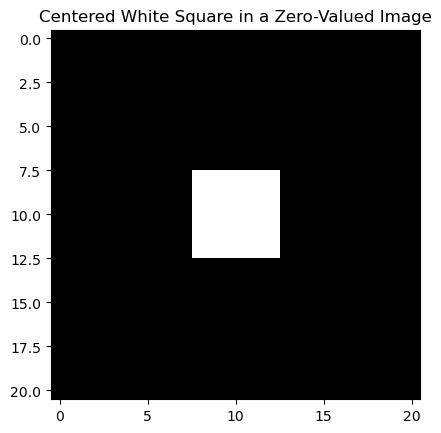

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from skimage import io
# Set the size of the image (rows, columns, cols) to an odd number.
rows, cols = 21, 21
image = np.zeros((rows, cols), dtype=np.uint8)

square_size = 5

# Calculate the row and column indices of the start and end of the square.
start_row = (rows - square_size) // 2
end_row   = start_row + square_size
start_col = (cols - square_size) // 2
end_col   = start_col + square_size

# Set the centre area to white (255)
image[start_row:end_row, start_col:end_col] = 255
print(image)
plt.imshow(image, cmap='gray')
plt.title("Centered White Square in a Zero-Valued Image")
plt.savefig('a6_1.4.png')
plt.show()

[[0. 0. 0. 0. 1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


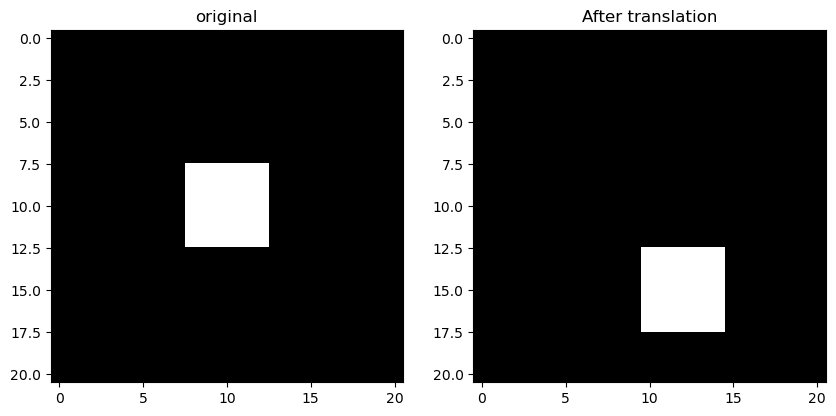

In [61]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

def translate_image(image, dx=0, dy=0, boundary='symm'):
    
    # Generate horizontal translation kernels
    kernel_x = np.zeros((1, 2*abs(dx)+1))
    kernel_x[0, abs(dx) + dx] = 1  
    print(kernel_x)
    
    # Generate vertical translation kernels
    kernel_y = np.zeros((2*abs(dy)+1, 1))
    kernel_y[abs(dy) + dy, 0] = 1
    print(kernel_y)
    
    # Translation in both directions
    shifted = convolve2d(image, kernel_x, mode='same', boundary=boundary)
    shifted = convolve2d(shifted, kernel_y, mode='same', boundary=boundary)
    return shifted


# Apply translation (2 pixels to the right, 5 pixels down)
shifted_image = translate_image(image, dx=2, dy=5, boundary='fill')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("original")
plt.subplot(1, 2, 2), plt.imshow(shifted_image, cmap='gray'), plt.title("After translation")
plt.savefig('a6_1.5.png')
plt.show()

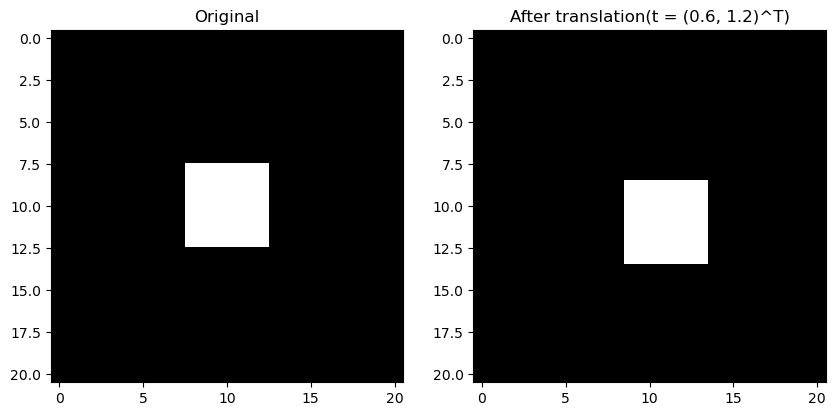

In [77]:
def translate_image_homogeneous(image, tx, ty):
    rows, cols = image.shape
    # Create target image (initialised to 0)
    translated = np.zeros_like(image)
    
    # homogeneous coordinate
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    
    for i in range(rows):
        for j in range(cols):
            # Find the inverse matrix of homogeneous coordinate and multiply the transformed coordinates.
            x, y, _ = np.linalg.inv(T) @ [i, j, 1]
            # nearest neighbor interpolation
            x_round = int(round(x))
            y_round = int(round(y))
            # Check that the image limit is not exceeded.
            if 0 <= x_round < rows and 0 <= y_round < cols:
                translated[i, j] = image[x_round, y_round]
    
    return translated
    
shifted_image = translate_homogeneous(image, tx=0.6, ty=1.2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(shifted_image, cmap='gray'), plt.title("After translation(t = (0.6, 1.2)^T)")
plt.savefig('a6_1.6.png')
plt.show()

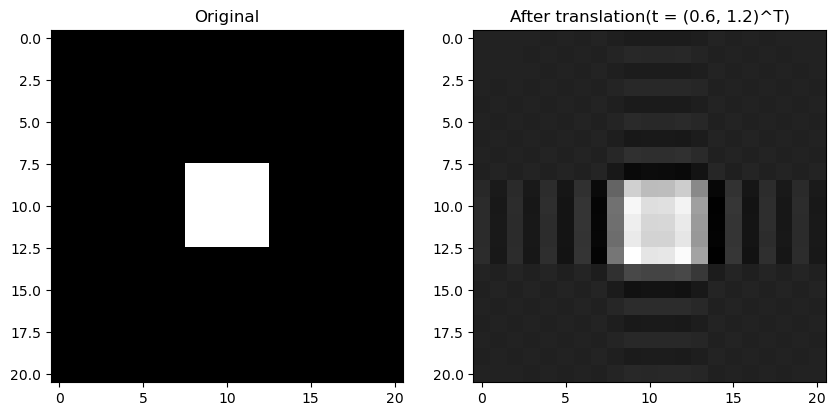

In [97]:
def fourier_translate(image, tx, ty):

    # Calculate the frequencies separately and then combine the frequency grids
    rows, cols = image.shape
    u = np.fft.fftfreq(cols)  
    v = np.fft.fftfreq(rows)  
    U, V = np.meshgrid(u, v)  

    # Calculate the Fourier transform
    F = fft2(image)
    
    # Fourier transform translation equation.
    phase_shift = np.exp(-2j * np.pi * (tx * U + ty * V))

    
    F_translated = F * phase_shift

    # Inverse Fourier transform back to the spatial domain
    translated_image = np.real(ifft2(F_translated))

    return translated_image

shifted_image = fourier_translate(image, tx=0.6, ty=1.2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(shifted_image, cmap='gray'), plt.title("After translation(t = (0.6, 1.2)^T)")
plt.savefig('a6_1.7.png')
plt.show()

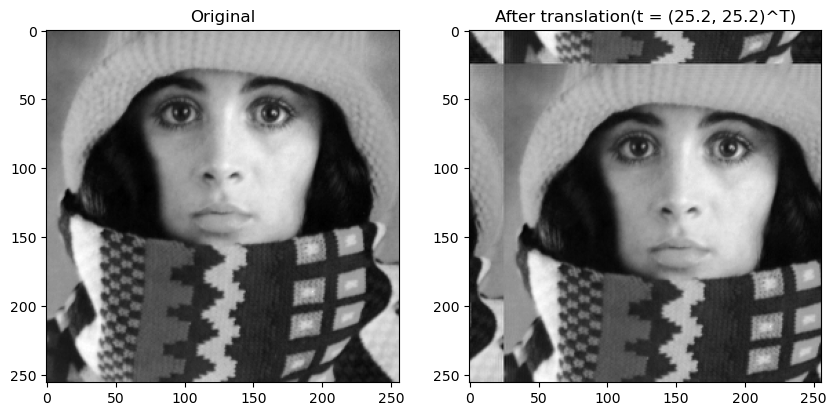

In [113]:
img = io.imread('trui.png')

shifted_image = fourier_translate(img, tx=25.2, ty=25.2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(shifted_image, cmap='gray'), plt.title("After translation(t = (25.2, 25.2)^T)")
plt.savefig('a6_1.8.png')
plt.show()